# Iris dataset com KNN

O Iris é um dataset clássico, e ele será usado aqui apenas para um exemplo para a aplicação do algoritmo knn. 

- Sobre o Knn
- Aplicação
- Treinando o modelo
- Avaliando o modelo

---

### Sobre o Knn

É um algoritmo de apredizado supervisionado, ou seja, devemos treiná-lo sob supervisão com dados já rotulados. Dado um conjunto de observações (x,y), precisamos estabelecer o relacionamento entre `x` _ os dados _ e `y` _ os rótulos _ para que quando tivermos novos dados, consigamos aplicar uma função que consiga prever corretamente o resultado desse dado.

O knn é fácil de ser implementado e é frequentemente utilizado como primeiro passo para se ensinar machine learning. É usado também em aplicações como predições para as áreas da economia, genética, agronomia, compressão de dados e etc.

E como funciona?

Digamos que temos duas classes de dados, a classe 1 (quadradinho azul) e a classe 2 (triângulo vermelho), e estes dados estão dispostos num plano. Agora imagine que um novo dado entra no modelo, mas este dado ainda não foi classificado, não sabemos a que classe ele pertence, se a 1 ou a 2. É essa nossa tarefa, usar o knn para descobrir à qual classe pertencerá esse novo dado de entrada.

Como o knn lida com isso? Pela maioria de votos de seus vizinhos mais próximos. Sim, é isso mesmo. Se a maioria destes vizinhos selecionados forem da classe 1, o novo dado será classificado como da classe 1, e se estes vizinhos forem majoritariamente da classe 2, esse dado será classificado como da classe 2. 

Portanto, devemos fornecer ao algoritmo um valor `k`, que é ***a quantidade de vizinhos mais próximos*** _ e de preferência devemos fornecer um valor que não gere empate.

Olhando para imagem abaixo, se `k = 1`, o vizinho mais próximo é da classe 1, logo, o novo dado será classificado como da classe 1. Se `k = 3`, os três vizinhos mais próximos serão avaliados, e pela imagem abaixo, percebemos que temos um da classe 1 e dois da classe 2, logo, o dado de entrada será classificado como da classe 2.

<div style="text-align:center">
<img src="img/knn.png" width="400" height="350" />
</div>

Esse processo deve ser feito como todos os novos dados de entrada. E depois disso, devemos avaliar se a classificação foi bem feita.

Toda vez que um novo dado entra no modelo para classificação, o algoritmo vai ordenar todos os dados e verificar quais os mais próximos dessa entrada. Quanto maior o valor de k, mais dados deverão ser processados e ordenados por proximidade para classificar o novo valor, que ao mesmo tempo que aumenta sua assertividade na classificação, é uma operação custosa do ponto de vista do processamento. Mas se o valor de k for baixo, resultará num overfitting.

***Um valor de k baixo falhará na generalização, um valor alto de k é custoso.***

Portanto temos que achar um valor de k que seja próximo do ideal para o nosso modelo.

No exemplo abaixo, temos os gráficos que idenficam os erros de classificação para as duas classes, e podemos perceber que quando aproximadamente `k = 8`, os erros dos dois lados são mínimos, mas se passa disso, os erros aumentam muito. 

<img src="img/error_graph.jpg" />

---

### Aplicação


In [2]:
# Pacotes
import pandas as pd
from pandas.plotting import scatter_matrix

import numpy as np
import mglearn

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

---

#### Conhecendo os dados

Baixar os dados do dataset do sklearn.

In [3]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()

In [4]:
print("Chaves do dataset: \n{}".format(iris_dataset.keys()))

Chaves do dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


- data: são os atributos
- target: são os ids dos dados alvo
- target_names: o rótulo de cada espécie que queremos prever
- DESCR: uma descrição do dataset
- feature_names: a descrição de cada atributo
- filename: o local da maquina onde está localizado o dataset

Cada linha do dataset é um registro de cada amostra de uma flor, as colunas são seus atributos, no caso as medidas em centímetros das pétalas e sépalas (width = largura; length = comprimento).

In [5]:
print(iris_dataset['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Aqui temos as três espécies das flores estudadas

In [6]:
print(iris_dataset['target_names'])

['setosa' 'versicolor' 'virginica']


Os dados que queremos estão no formato `numpy.ndarray`

In [7]:
print("Tipo de dado: {}".format(type(iris_dataset['data'])))

Tipo de dado: <class 'numpy.ndarray'>


In [8]:
iris_dataset['data'].shape

(150, 4)

Vamos dividir nossos dados em treino e teste, com treino de 25% e de forma randômica, para que diminua a chance de haver seleção de dados de apenas uma classe.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=123, train_size=0.25
)

In [11]:
print("X treino:\t", X_train.shape)
print("X teste:\t", X_test.shape)
print("y treino:\t", y_train.shape)
print("y teste:\t", y_test.shape)

X treino:	 (37, 4)
X teste:	 (113, 4)
y treino:	 (37,)
y teste:	 (113,)


Preparando os dados para visualização.

In [12]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

In [13]:
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,6.9,3.1,4.9,1.5
1,5.8,2.6,4.0,1.2
2,5.7,2.8,4.1,1.3
3,7.6,3.0,6.6,2.1
4,5.0,3.4,1.5,0.2


In [14]:
y_train[:5]

array([1, 1, 1, 2, 0])

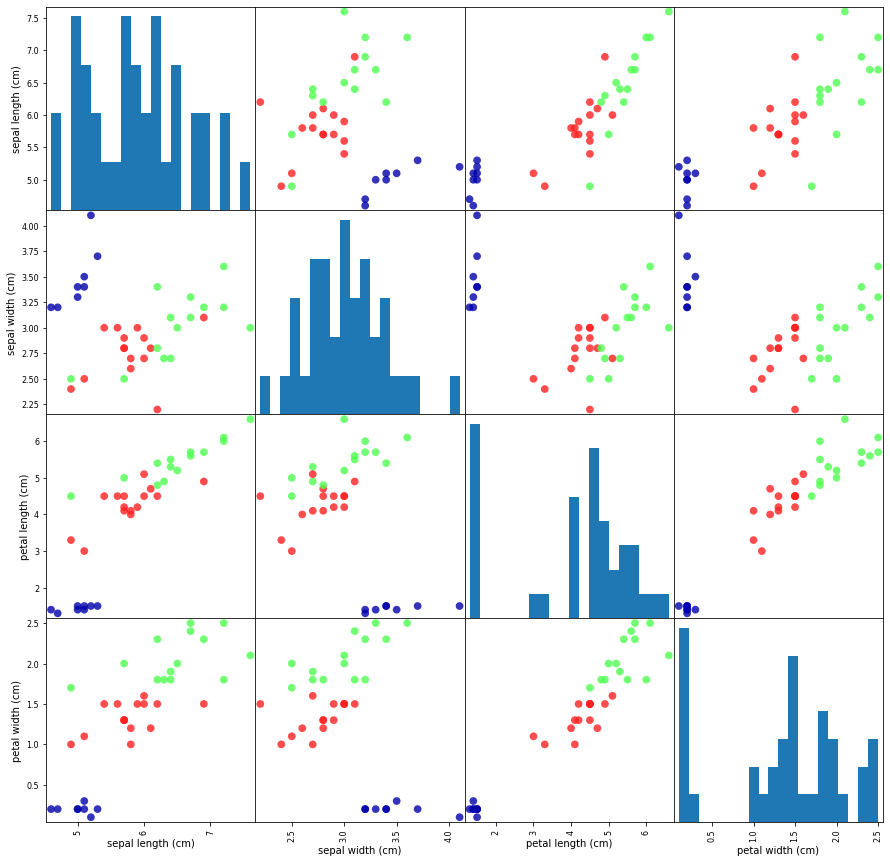

In [15]:
grr = scatter_matrix(iris_dataframe, c=y_train, 
                        figsize=(15, 15), 
                        marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8,
                        cmap=mglearn.cm3);

Observando os gráficos, é possível perceber que as classes estão relativamente separadas. Com isso podemos concluir que um algoritmo de ML poderá aprender a separar os dados.

---

### Treinando o modelo

O algoritmo classificador knn é implementado pela classe `KNeighborsClassifier`. Antes de utilizar essa classe, devemos instanciá-la em um objeto. É aqui que setamos os parâmetro do modelo, sendo o mais importante dele, a quantidade de vizinhos.

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
# Definir o valor de vizinhos
knn = KNeighborsClassifier(n_neighbors=1) 

Ele vai encapsular o algoritmo que será usado para construir o modelo dos dados de treinamento, e também o algoritmo que fará a previsão dos novos dados de entrada.

Depois basta treinar o modelo com o método `fit` usando os dados de treinamento `X_train` e seus rótulos `y_train`

In [18]:
# Treinando o modelo
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

---

### Fazendo previsões

Treinado o modelo, podemos entrar com alguns dados para obter a previsão de suas classes.

Aqui criei este dicionário apenas para não perdermos de vista os rótulos dos dados.

In [19]:
X_ndata = {'sepal length (cm)': 5, 'sepal width (cm)': 2.9, 
           'petal length (cm)': 1, 'petal width (cm)': 0.2}

In [20]:
# Passando o dicionário para np.array

X_new = np.array([list(X_ndata.values())])
X_new

array([[5. , 2.9, 1. , 0.2]])

Não podemos esquecer que o scikit-learn sempre trabalha com arrays de duas dimensões, por isso vamos ver seu shape para validar se a conversão deu certo:

In [21]:
X_new.shape # certo, temos um array de duas dimensões: 1 linha, 4 colunas

(1, 4)

In [22]:
prediction = knn.predict(X_new)

In [23]:
print("Previsão: {}".format(prediction))

Previsão: [0]


In [24]:
print("Nome da classe prevista: {}".format(iris_dataset['target_names'][prediction]))

Nome da classe prevista: ['setosa']


O modelo previu que este novo dado de entrada da flor pertence a classe `0`, a `setosa`. 

Isso não quer dizer que acertamos, precisamos avaliar a qualidade do modelo.

---

### Avaliando o modelo

Não temos certeza do resultado que o modelo nos deu, mas, ainda temos uma parte dos dados que não usamos, os dados de teste, e estes sim, sabemos suas classes corretas. Portanto, podemos usar os dados de teste para ver se o modelo vai fazer as previsões corretas, e com isso avaliar o modelo. 

In [25]:
y_pred = knn.predict(X_test)
print("Previsões dos dados de teste:\n {}".format(y_pred))

Previsões dos dados de teste:
 [2 2 2 1 0 2 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 1 0 2 0 0 0 2 2 0 2 1 0 0 1 1 2
 0 0 1 1 0 2 2 2 2 2 1 0 0 2 0 0 1 1 1 1 2 1 2 0 2 1 0 0 2 1 2 2 0 1 1 1 0
 2 1 1 0 2 2 0 0 1 2 2 0 0 1 0 2 2 0 2 0 0 1 0 0 1 2 1 1 1 0 0 1 1 0 0 1 1
 1 2]


In [26]:
#print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

print("Score dos dados de teste: {:.2f}".format(knn.score(X_test, y_test)))

Score dos dados de teste: 0.94


In [43]:
pred_i != y_test

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False])

In [38]:
e

0.061946902654867256

Para este modelo, a acuracia dos dados de teste é de `0,94`, e isso quer dizer que a previsão correta será feita em 94% dos casos.

Por ser um dataset pequeno, podemos ainda ter dúvidas se esse valor é confiável. Mas também temos que lembrar que se trata de uma aplicação simples, e com um percentual elevado, então podemos crer que este valor seja confiável o suficiente para usarmos esse modelo.

Outra forma de avaliar é através da matriz de confusão.

In [27]:
from sklearn.metrics import classification_report,confusion_matrix, f1_score

In [28]:
print(confusion_matrix(y_test, y_pred))

[[42  0  0]
 [ 0 32  3]
 [ 0  4 32]]


- | 0: setosa | 1: versicolor | 2: virginica |
--|--|--|--|
**0: setosa** | 42 | 0 | 0 |
**1: versicolor** | 0 | 32 | 3 |
**2: virginica** | 0 | 4 | 32 |


Olhando para as colunas:

- O modelo previu 42 flores como setosa e acertou todas;
- O modelo previu 36 flores como versicolor, ele acertou em 32 e errou em 4 (virginica)
- O modelo previu 35 flores como virginica, ele acertou em 32 e errou em 3 (versicolor)

Vamos relembrar rapidamente as métricas de avaliação:

**Acurácia (accuracy)**: Retorna a acurácia geral do modelo, que é a fração do total de amostras que foram corretamente classificadas.

(TP + TN) / (TP + TN + FP + FN)

**Precisão (precision)**: Retorna a fração das predições da classe positiva que foram de fato previsto como positivas.

TP / (TP+FP)

**Sensibilidade (recall)**: Retorna a fração de todas as amostras positivas que foram corretamente previstas como verdadeiro positivo.

TP / (TP + FN)

**Especificidade (specificity)**: Retorna a fração das amostras negativas que foram corretamente previstas como negativas.

TN / (TN + FP)

**F1-score**: Combina a precisão e a sensibilidade numa medida única.

2 * ((precisão * sensibilidade) / (precisão + sensibilidade)) = 2 * TP / (2*TP + FP + FN)

- | TP | TN | FP | FN |
--|--|--|--|--|
**0: setosa** | 42 | 71 | 0 | 0 |
**1: versicolor** | 32 | 75 | 3 | 4 |
**2: virginica** | 32 | 74 | 4 | 3 |

- | Setosa | Versicolor | Virginica |
--|--|--|--|
**acurácia** | 113 / 113 = 1 | 107 / 113 = 0,96 | 106 / 113 = 0,94 |
**precisão** | 42 / 42 = 1 | 32 / 35 = 0,91 | 32 / 36 = 0,89 |
**sensibilidade** | 42 / 42 = 1  | 32 / 36 = 0,89 | 32 / 35 = 0,89 |
**f1-score** | 2 * (1 / 2) = 1 | 2 * (0,8099 / 1,8) = 0,90 | 2 * (1,8 / 0,8099) = 0,90 | 

Claro que as contas acima são apenas para um melhor entendimento, porque existem maneiras de ter estes resultados vinda de uma função.

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.89      0.91      0.90        35
           2       0.91      0.89      0.90        36

    accuracy                           0.94       113
   macro avg       0.93      0.93      0.93       113
weighted avg       0.94      0.94      0.94       113



In [30]:
# Outra forma de obter o f1_score

print(f1_score(y_test, y_pred, average='macro'))

0.9342723004694836


#### Encontrando um outro valor para k

Para fixar, vamos voltar ao esquema de classificação:

- É selecionado um valor para k
- Calcula-se a distância entre os dados de teste e dados de treino
- Checar a classe dos vizinhos mais próximos e classificar os dados de entrada
- A classificação é feita pela maioria de votos
- Uma classe é retornada para cada dado de entrada

No começo não sabemos o melhor valor para k, e também não há um método estatístico para encontrar esse valor, por isso selecionamos um valor aleatório inicialmente.

Para isso, podemos treinar o modelo com valores diferentes de k, e a cada novo valor, verificar a taxa de erro e plotar no gráfico. Ao final, podemos encontrar a menor taxa de erro, e selecionar este valor de k.

In [51]:
def error_rate(X_train, y_train, X_test, y_test):
    """
    Treina o algoritmo do knn com diferentes valores de k
    Gera as previsões para cada valor de k
    Retorna o error_rating, que é a média dos erros de previsão, ou seja,
    a diferença da previsão para o valor de teste.
    """
    error_rate = []

    # Levará algum tempo
    for i in range(1,20):

        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train) # treinar o modelo
        pred_i = knn.predict(X_test) # gerar as previsões
        # verifica se o valor previsto é diferente do valor de teste, 
        # ao final tira a média dos erros
        error_rate.append(np.mean(pred_i != y_test))
        
    return error_rate

def errors_chart(error_rate):
    """
    Recebe os erros e plota no gráfico
    """
    plt.figure(figsize=(10,6))
    plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate x K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')

In [49]:
erros = error_rate(X_train, y_train, X_test, y_test)

In [50]:
erros

[0.061946902654867256,
 0.07079646017699115,
 0.07079646017699115,
 0.05309734513274336,
 0.05309734513274336,
 0.04424778761061947,
 0.05309734513274336,
 0.05309734513274336,
 0.061946902654867256,
 0.035398230088495575,
 0.035398230088495575,
 0.08849557522123894,
 0.05309734513274336,
 0.07964601769911504,
 0.08849557522123894,
 0.09734513274336283,
 0.4247787610619469,
 0.46017699115044247,
 0.46017699115044247]

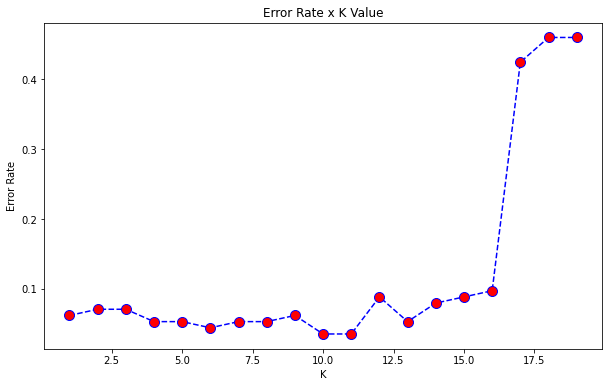

In [52]:
errors_chart(erros)

A menor taxa de erros está entre `k 10 e 11`, e depois de k = 13 os erros começam a aumentar.

Vamos treinar o modelo novamente, mas agora com `k = 10`.

In [54]:
# Agora com K = 10
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('Com K=10')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

Com K=10


[[42  0  0]
 [ 0 34  1]
 [ 0  3 33]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.92      0.97      0.94        35
           2       0.97      0.92      0.94        36

    accuracy                           0.96       113
   macro avg       0.96      0.96      0.96       113
weighted avg       0.97      0.96      0.96       113



De fato, a acurácia melhorou cerca de 0.2 pontos com `k = 10`.

---

### Referências

https://scikit-learn.org/stable/datasets.html

https://github.com/amueller/introduction_to_ml_with_python

https://medium.com/data-hackers/entendendo-o-que-%C3%A9-matriz-de-confus%C3%A3o-com-python-114e683ec509

https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

https://inferir.com.br/artigos/algoritimo-knn-para-classificacao/

https://www.digitalocean.com/community/tutorials/processing-incoming-request-data-in-flask-pt

https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb